# Ứng dụng học máy trong đánh giá rủi ro tín dụng của khách hàng

## Nhóm 10 - 241IS55A01

## 1. Mô tả bài toán

### Dữ liệu

Tập dữ liệu Kaggle - HR Analytics (https://www.kaggle.com/datasets/pradip11/amexpert-codelab-2021/data)

- Số lượng bản ghi: 45528 bản ghi

- Số lượng thuộc tính: 19 thuộc tính



| Cột                         | Mô tả                                                   | Kiểu dữ liệu |

|-----------------------------|---------------------------------------------------------|--------------|

| **customer_id**             | ID của khách hàng                                       | object       |

| **name**                    | Tên của khách hàng                                      | object       |

| **age**                     | Tuổi của khách hàng                                     | int64        |

| **gender**                  | Giới tính của khách hàng                                | object       |

| **owns_car**                | Khách hàng có sở hữu xe hay không                       | object       |

| **owns_house**              | Khách hàng có sở hữu nhà hay không                      | object       |

| **no_of_children**          | Số lượng con của khách hàng                             | float64      |

| **net_yearly_income**       | Thu nhập ròng hàng năm của khách hàng                   | float64      |

| **no_of_days_employed**     | Số ngày đã làm việc của khách hàng                      | float64      |

| **occupation_type**         | Loại nghề nghiệp của khách hàng                         | object       |

| **total_family_members**    | Tổng số thành viên trong gia đình                       | float64      |

| **migrant_worker**          | Khách hàng có phải lao động di cư không                 | float64      |

| **yearly_debt_payments**    | Tổng số tiền trả nợ hàng năm                            | float64      |

| **credit_limit**            | Hạn mức tín dụng                                        | float64      |

| **credit_limit_used(%)**    | Tỷ lệ % hạn mức tín dụng đã sử dụng                     | int64        |

| **credit_score**            | Điểm tín dụng                                           | float64      |

| **prev_defaults**           | Số lần nợ quá hạn trước đây                             | int64        |

| **default_in_last_6months** | Số lần nợ quá hạn trong 6 tháng qua                     | int64        |

| **credit_card_default**     | Rủi ro tín dụng khi sử dụng thẻ tín dụng của khách hàng | int64        |


### Chiến lược phân tích:

- Với tham số cơ bản và các cách thức chia tập dữ liệu khác nhau, thực hiện chạy 5 mô hình **Random Forest (gini), Naive Bayes, Gradient Boosting, XGBoost, Neural Network**, tạo bảng số liệu các độ đo.

- Dựa trên bảng số liệu đã tạo, đi vào chi tiết các mô hình và phương pháp chia dữ liệu tương ứng với nó cho kết quả tốt.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns



import graphviz

from sklearn.tree import export_graphviz



from collections import Counter



from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()



from sklearn.model_selection import (

    train_test_split, GridSearchCV, RandomizedSearchCV,

    StratifiedKFold, RepeatedStratifiedKFold, cross_val_score

)

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE



from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier



from sklearn.metrics import (

    accuracy_score, precision_score, recall_score, f1_score,

    matthews_corrcoef, balanced_accuracy_score, classification_report,

    confusion_matrix, ConfusionMatrixDisplay,

    roc_curve, roc_auc_score, auc, mean_squared_error

)



from IPython.display import FileLink, display

import joblib

## 2. Phân tích dữ liệu

### 2.1. Đọc dữ liệu

In [2]:
pd.set_option('display.max_columns', None)

pd.options.display.float_format = '{:.2f}'.format

In [3]:
# df = pd.read_csv('data.csv')

df = pd.read_csv('/kaggle/input/credit-risk-data/data.csv')



df.head(5)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.00,107934.04,612.00,Unknown,1.00,1.00,33070.28,18690.93,73,544.00,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.00,109862.62,2771.00,Laborers,2.00,0.00,15329.53,37745.19,52,857.00,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.00,230153.17,204.00,Laborers,2.00,0.00,48416.60,41598.36,43,650.00,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.00,122325.82,11941.00,Core staff,2.00,0.00,22574.36,32627.76,20,754.00,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.00,387286.00,1459.00,Core staff,1.00,0.00,38282.95,52950.64,75,927.00,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

### 2.2. Xoá các cột không cần thiết, xử lý dữ liệu trùng, khuyết thiếu

In [5]:
df.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [6]:
columns_to_drop = ['customer_id', 'name']

df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.dropna(inplace=True)

df = df[df['gender'] != 'XNA']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43508 entries, 0 to 45527
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      43508 non-null  int64  
 1   gender                   43508 non-null  object 
 2   owns_car                 43508 non-null  object 
 3   owns_house               43508 non-null  object 
 4   no_of_children           43508 non-null  float64
 5   net_yearly_income        43508 non-null  float64
 6   no_of_days_employed      43508 non-null  float64
 7   occupation_type          43508 non-null  object 
 8   total_family_members     43508 non-null  float64
 9   migrant_worker           43508 non-null  float64
 10  yearly_debt_payments     43508 non-null  float64
 11  credit_limit             43508 non-null  float64
 12  credit_limit_used(%)     43508 non-null  int64  
 13  credit_score             43508 non-null  float64
 14  prev_defaults            43

### 2.3. Thống kê ban đầu

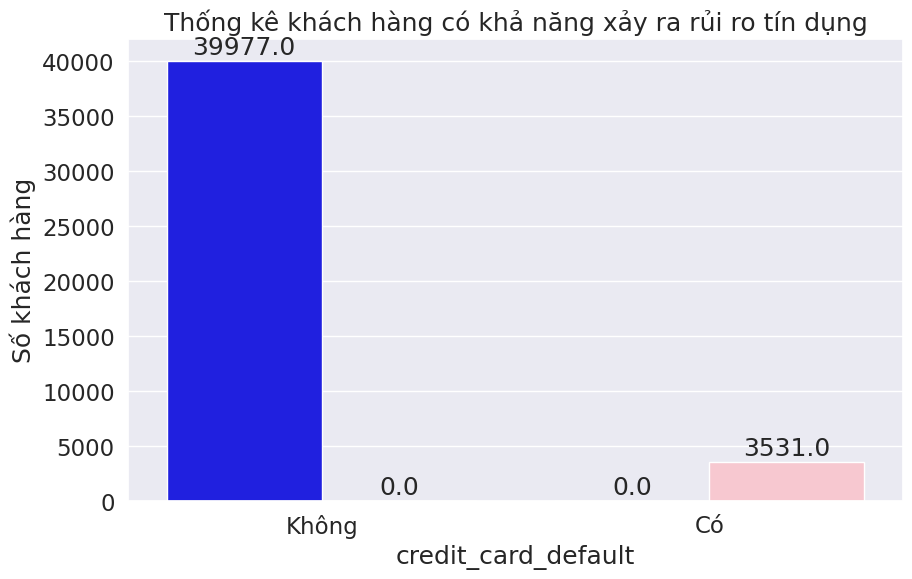

In [10]:
sns.set(font_scale=1.5)



ax = sns.countplot(x='credit_card_default', data=df, hue='credit_card_default', palette=['blue', 'pink'])

ax.legend_.remove()



ax.set_title('Thống kê khách hàng có khả năng xảy ra rủi ro tín dụng')

ax.set_ylabel('Số khách hàng')



ax.set_xticks([0, 1])

ax.set_xticklabels(['Không', 'Có'])



fig = plt.gcf()

fig.set_size_inches(10, 6)



for p in ax.patches:

    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),

                ha='center', va='center', xytext=(0, 10), textcoords='offset points')



plt.show()

In [11]:
display(df.describe())

display(df.describe(include='object'))

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,43508.00,43508.00,43508.00,43508.00,43508.00,43508.00,43508.00,43508.00,43508.00,43508.00,43508.00,43508.00,43508.00
mean,39.00,0.42,200896.72,67632.82,2.16,0.18,31813.12,43603.76,52.24,782.79,0.06,0.05,0.08
std,9.54,0.72,684060.10,139342.81,0.91,0.38,17274.94,152079.05,29.38,100.58,0.26,0.22,0.27
min,23.00,0.00,27170.61,2.00,1.00,0.00,2237.47,4003.14,0.00,500.00,0.00,0.00,0.00
25%,31.00,0.00,126288.97,937.00,2.00,0.00,19238.23,23977.12,27.00,704.00,0.00,0.00,0.00
50%,39.00,0.00,171644.19,2224.00,2.00,0.00,29105.21,35689.46,54.00,786.00,0.00,0.00,0.00
75%,47.00,1.00,240771.15,5812.50,3.00,0.00,40578.04,53478.75,79.00,867.00,0.00,0.00,0.00
max,55.00,9.00,140759012.73,365252.00,10.00,1.00,328112.86,31129970.49,99.00,949.00,2.00,1.00,1.00


,gender,owns_car,owns_house,occupation_type
count,43508,43508,43508,43508
unique,2,2,2,19
top,F,N,Y,Unknown
freq,28629,28757,30254,13676


### 2.4. Tìm và xử lý dữ liệu ngoại lai

In [12]:
def detect_outliers(df, n, features):

    outlier_indices = []

    

    for col in features:

        Q1 = np.percentile(df[col], 25)

        Q3 = np.percentile(df[col], 75)

        IQR = Q3 - Q1

        

        outlier_step = 1.5 * IQR

        

        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index



        outlier_indices.extend(outlier_list_col)

        

    outlier_indices = Counter(outlier_indices)        

    multiple_outliers = list (k for k, v in outlier_indices.items() if v > n)

    

    return multiple_outliers

In [13]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()



outliers_to_drop = detect_outliers(df, 2, numeric_columns)

In [14]:
df.loc[outliers_to_drop]

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
148,37,F,N,Y,3.00,275375.99,1811.00,Cooking staff,5.00,1.00,32217.82,54670.47,29,853.00,0,0,0
311,40,F,Y,N,3.00,130423.29,4783.00,Unknown,5.00,1.00,20190.52,26993.43,48,862.00,0,0,0
434,26,M,N,N,3.00,142152.45,560.00,Core staff,5.00,0.00,30550.61,25228.59,85,612.00,1,1,1
471,42,M,N,Y,3.00,168249.99,365250.00,Unknown,5.00,0.00,48430.75,19225.51,6,747.00,0,0,0
641,45,M,Y,Y,3.00,342765.40,880.00,Core staff,5.00,0.00,32490.25,127262.52,83,899.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45294,53,M,N,N,0.00,120433.06,683.00,Unknown,1.00,0.00,22178.92,17752.59,76,628.00,1,1,1
45316,53,F,N,Y,0.00,278870.16,545.00,Medicine staff,2.00,0.00,35345.25,36486.25,76,576.00,1,1,1
45362,49,F,N,Y,0.00,231039.51,1650.00,Laborers,2.00,0.00,35426.60,73616.91,77,563.00,1,1,1
45447,42,F,N,Y,1.00,185931.39,5423.00,Medicine staff,3.00,0.00,25691.84,23802.53,89,622.00,1,1,1


In [15]:
df = df.drop(outliers_to_drop, axis = 0).reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40610 entries, 0 to 40609
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      40610 non-null  int64  
 1   gender                   40610 non-null  object 
 2   owns_car                 40610 non-null  object 
 3   owns_house               40610 non-null  object 
 4   no_of_children           40610 non-null  float64
 5   net_yearly_income        40610 non-null  float64
 6   no_of_days_employed      40610 non-null  float64
 7   occupation_type          40610 non-null  object 
 8   total_family_members     40610 non-null  float64
 9   migrant_worker           40610 non-null  float64
 10  yearly_debt_payments     40610 non-null  float64
 11  credit_limit             40610 non-null  float64
 12  credit_limit_used(%)     40610 non-null  int64  
 13  credit_score             40610 non-null  float64
 14  prev_defaults         

### 2.5. Phân tích một số biến

#### Ma trận tương quan

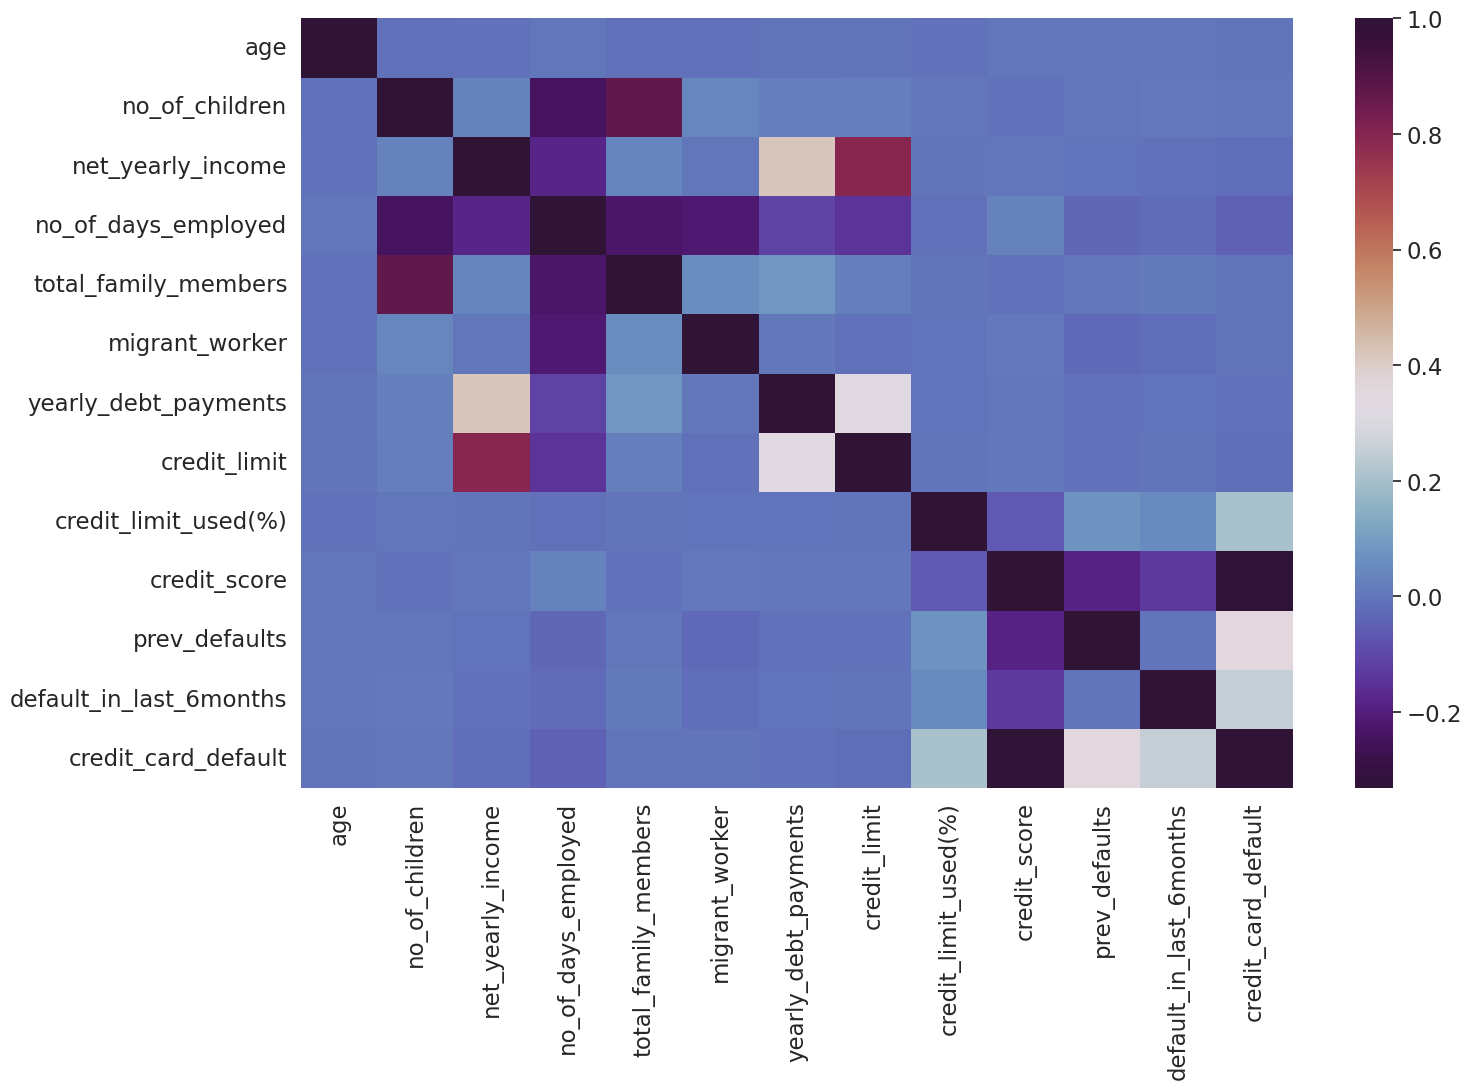

In [16]:
numeric_df = df[numeric_columns]



plt.figure(figsize=(16, 10))

sns.heatmap(numeric_df.corr(), annot=False, fmt='.2f', cmap='twilight_shifted')

plt.show()

#### Đánh giá

- ```credit_limit``` và ```credit_score```: Có mối tương quan khá mạnh (gần với 0.8). Những người có điểm tín dụng cao hơn có xu hướng có hạn mức tín dụng cao hơn.



- ```credit_limit``` và ```yearly_debt_payments```: Có mối tương quan dương giữa hạn mức tín dụng và các khoản thanh toán nợ hàng năm, yếu hơn một chút so với điểm tín dụng.



- ```prev_defaults``` và ```default_in_last_6_months```: Có mối tương quan mạnh mẽ, gần với 1 (người có lịch sử nợ trước đây có khả năng cao cũng sẽ quá hạn nợ trong 6 tháng gần nhất)



- ```credit_limit_used (%)``` và ```prev_defaults```: Mức sử dụng tín dụng (% tín dụng đã dùng) có một tương quan nhẹ âm với số lần nợ trước đây.



- Các biến khác không thể hiện mối tương quan mạnh với khả năng rủi ro tín dụng (có hay không), có thể có nghĩa là các yếu tố khác như hành vi tín dụng và điều kiện thị trường có ảnh hưởng mạnh hơn so với những biến hiển thị ở đây.

#### Phân phối của các biến đối với Attrition

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

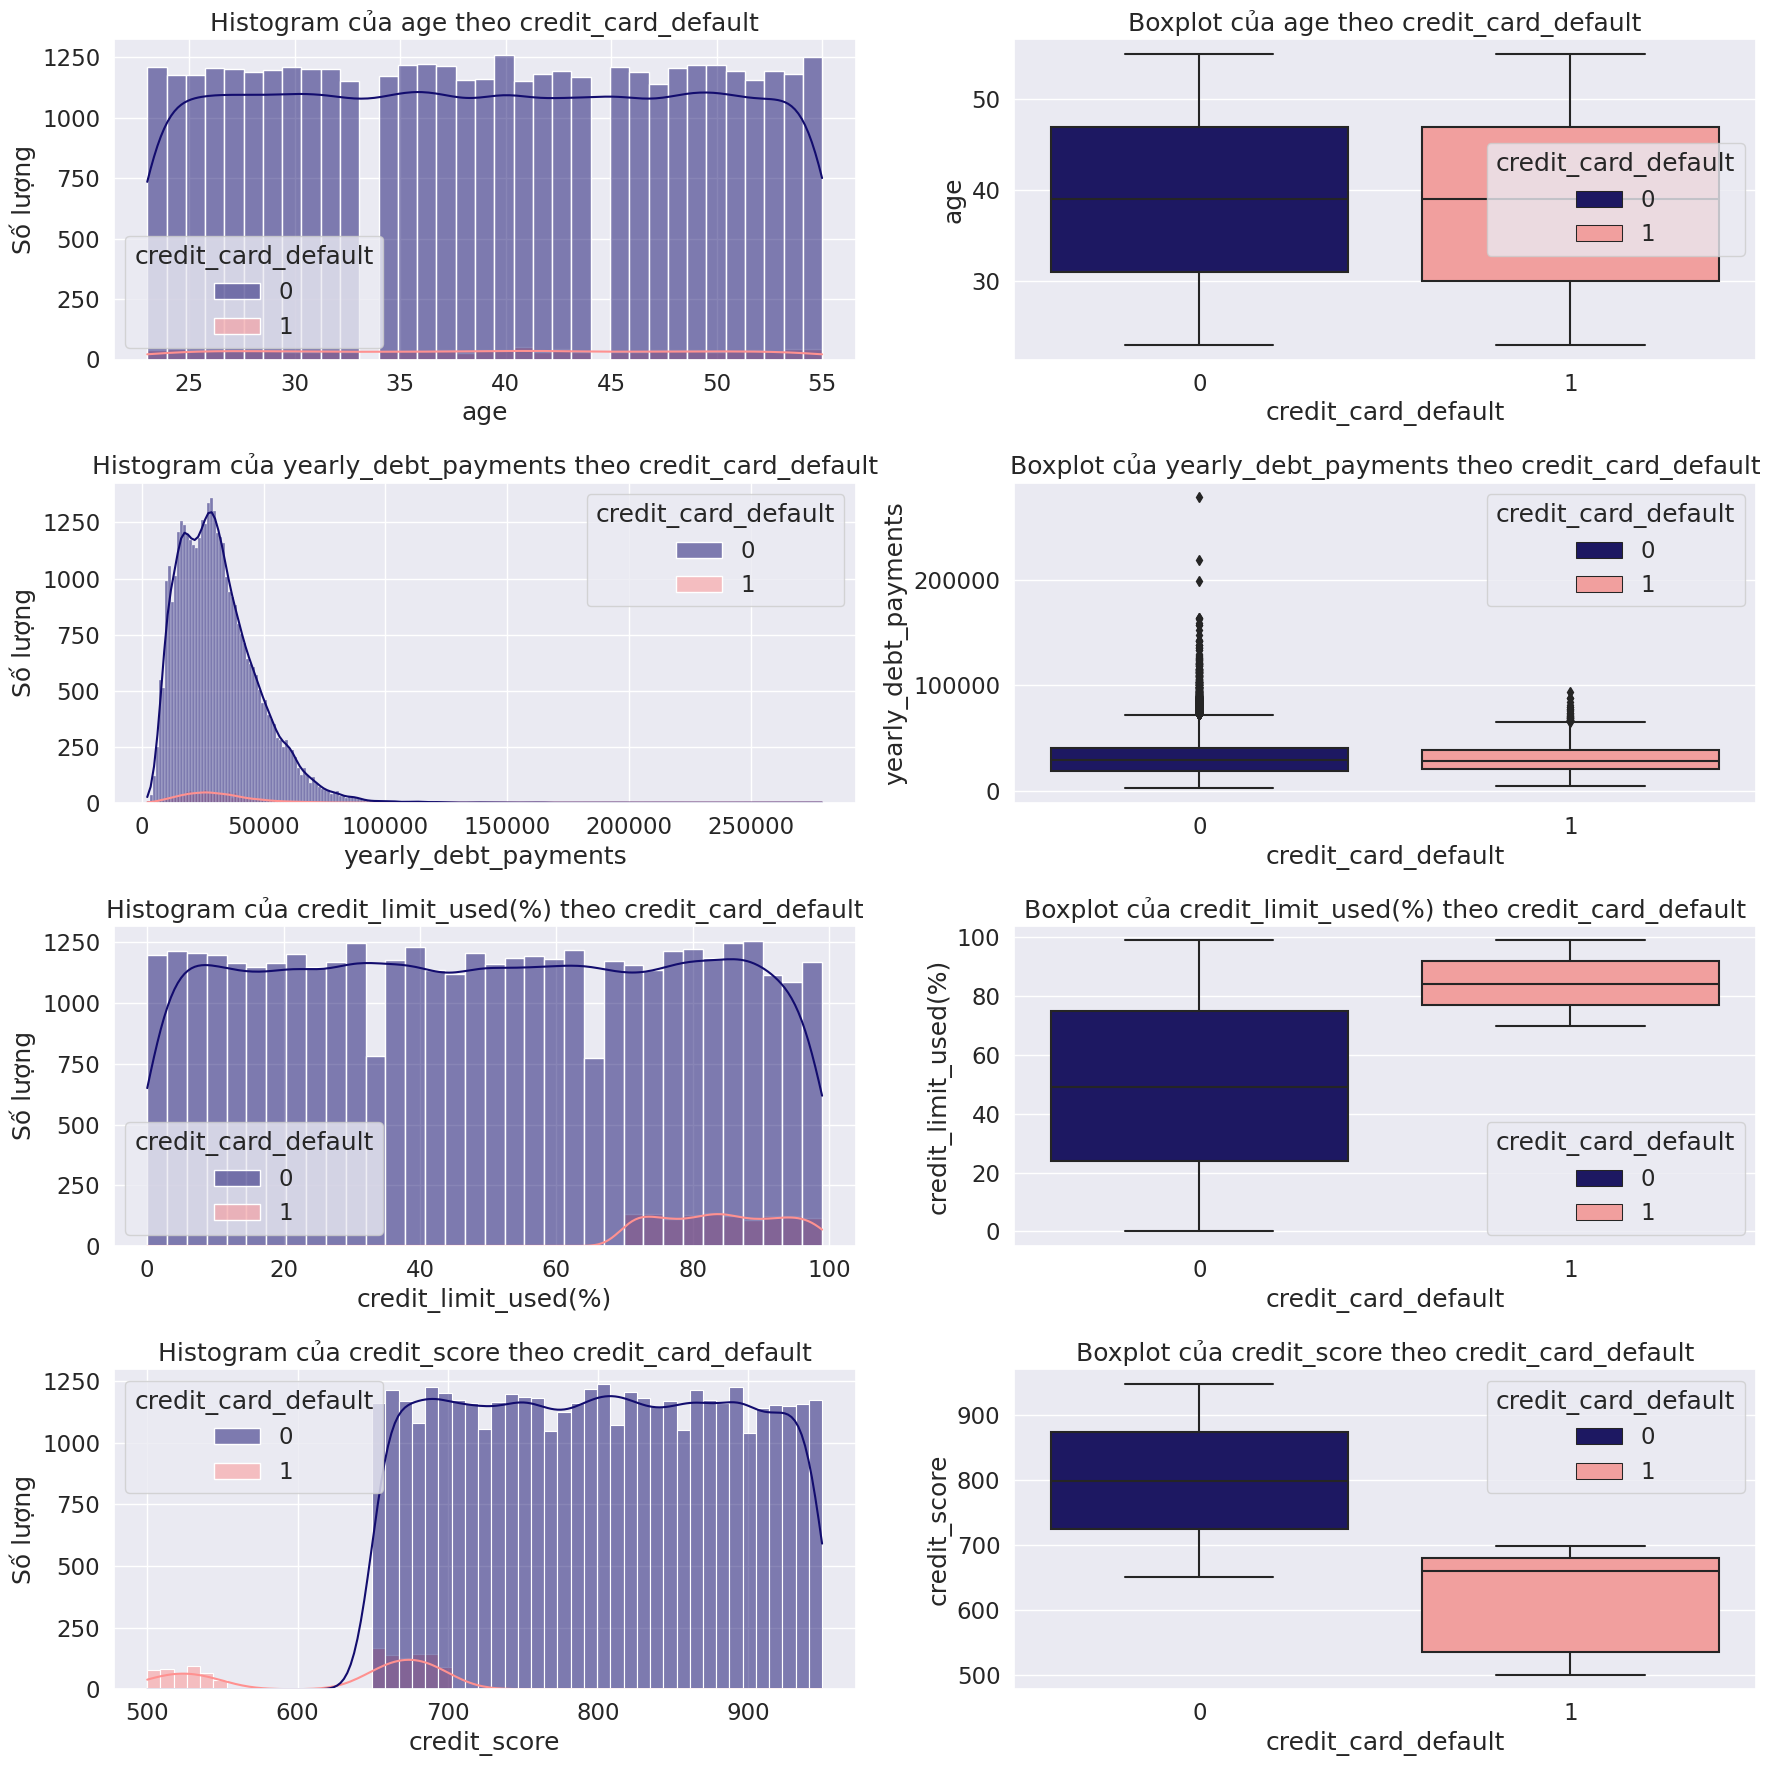

In [17]:
columns = [

    'age', 'yearly_debt_payments', 'credit_limit_used(%)', 'credit_score'

]



sns.set_palette('pastel')



plt.figure(figsize=(18, 18))

for i, col in enumerate(columns):

    

    plt.subplot(len(columns), 2, i * 2 + 1)

    sns.histplot(data=df, x=col, hue='credit_card_default', kde=True, palette=['#120c6e', '#ff9190'])

    plt.xlabel(col)

    plt.ylabel('Số lượng')

    plt.title(f'Histogram của {col} theo credit_card_default')



    plt.subplot(len(columns), 2, i * 2 + 2)

    sns.boxplot(x='credit_card_default', y=col, data=df, hue='credit_card_default', palette=['#120c6e', '#ff9190'], dodge=False)

    plt.xlabel('credit_card_default')

    plt.ylabel(col)

    plt.title(f'Boxplot của {col} theo credit_card_default')



plt.tight_layout()

plt.show()

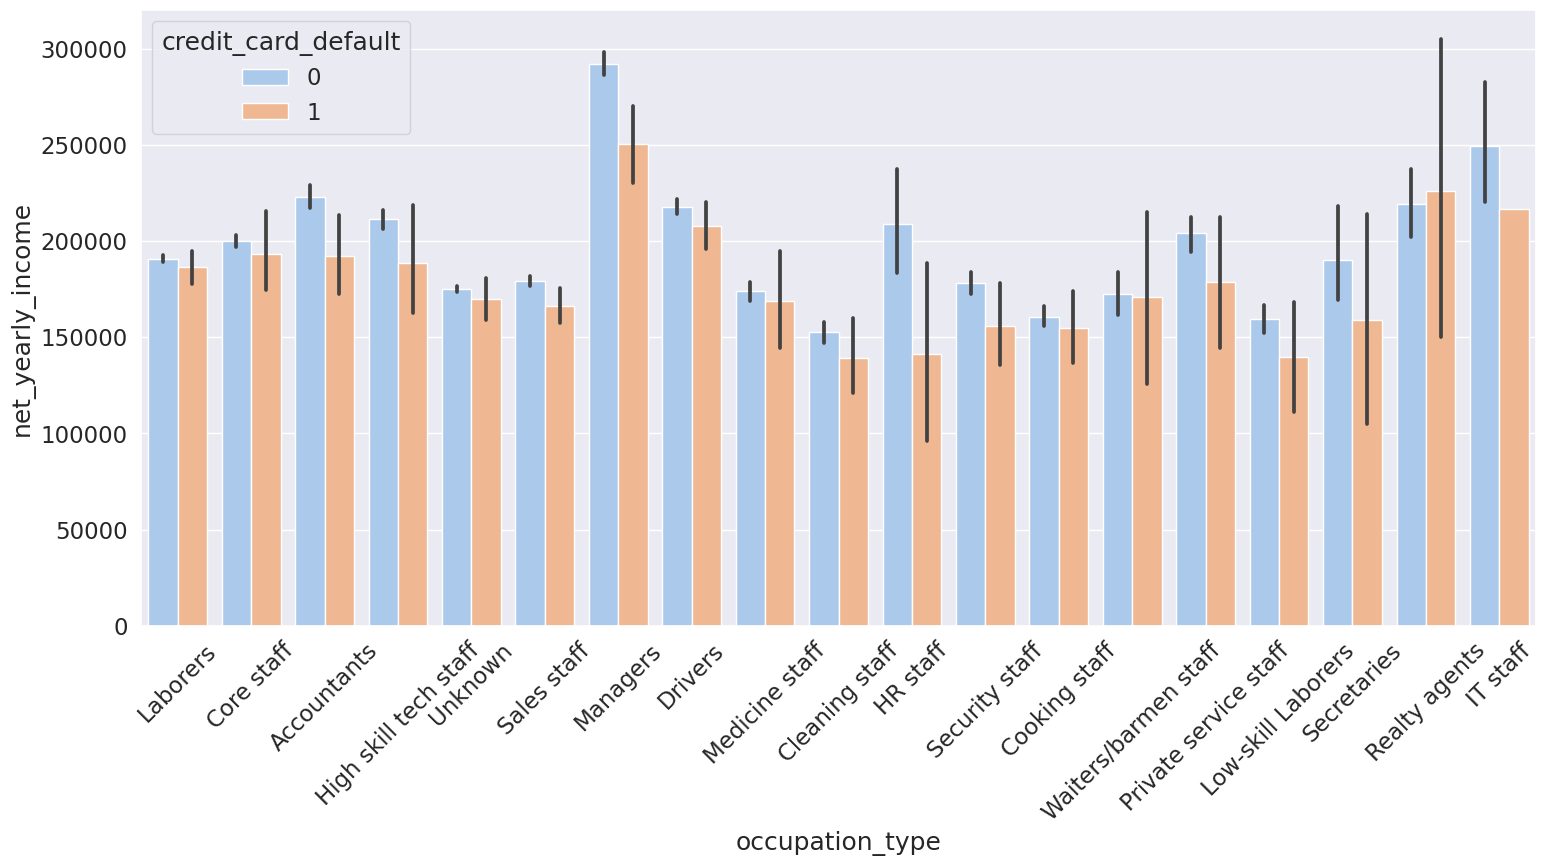

In [18]:
plt.figure(figsize=[18,8])

sns.barplot(x=df['occupation_type'], y=df['net_yearly_income'], hue=df['credit_card_default'])

plt.xticks(rotation=45)

plt.show()

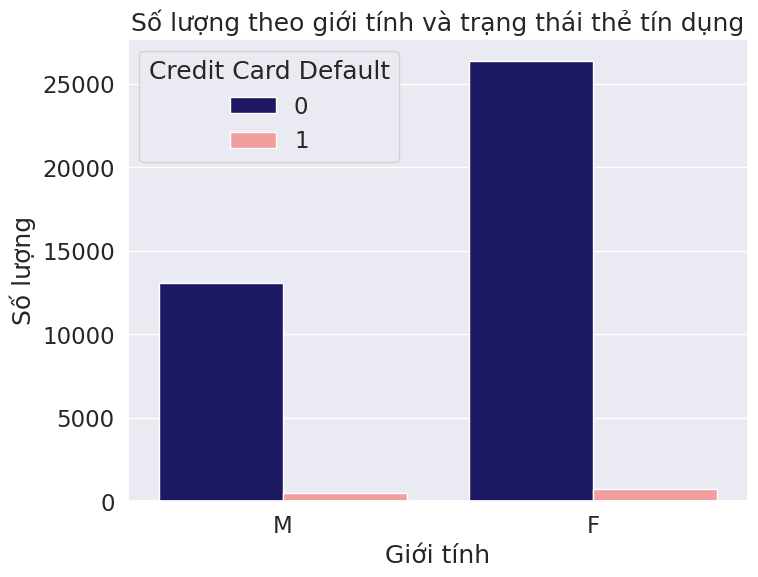

In [19]:
plt.figure(figsize=[8, 6])

sns.countplot(x='gender', hue='credit_card_default', data=df, palette=['#120c6e', '#ff9190'])

plt.xlabel('Giới tính')

plt.ylabel('Số lượng')

plt.title('Số lượng theo giới tính và trạng thái thẻ tín dụng')

plt.legend(title='Credit Card Default')

plt.show()

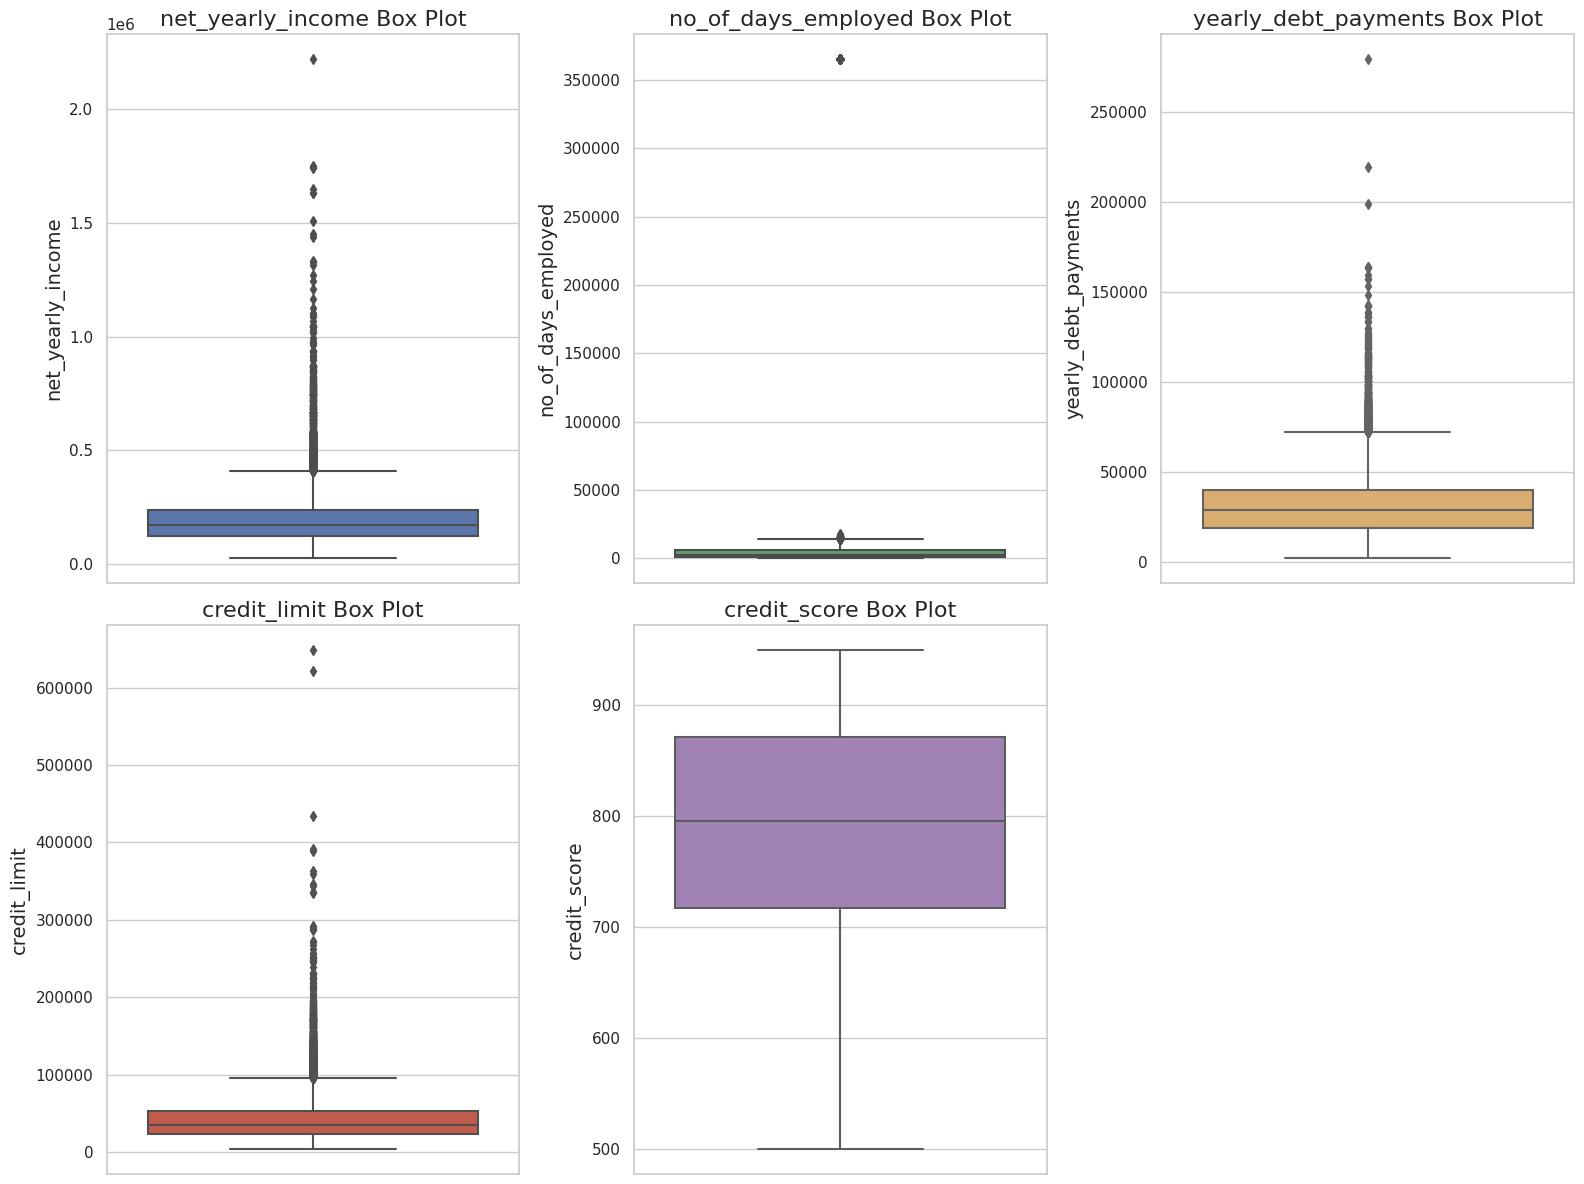

In [20]:
sns.set(style='whitegrid')



columns = [

    ('net_yearly_income', '#4C72B8', 'net_yearly_income'),

    ('no_of_days_employed', '#55A868', 'no_of_days_employed'),

    ('yearly_debt_payments', '#EBAE5E', 'yearly_debt_payments'),

    ('credit_limit', '#D44E3A', 'credit_limit'),

    ('credit_score', '#A27BBA', 'credit_score')

]



plt.figure(figsize=[16, 12])



for i, (col, color, title) in enumerate(columns, 1):

    plt.subplot(2, 3, i)

    sns.boxplot(y=df[col], color=color)

    plt.title(f'{title} Box Plot', fontsize=16)

    plt.ylabel(title, fontsize=14)



plt.tight_layout()

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


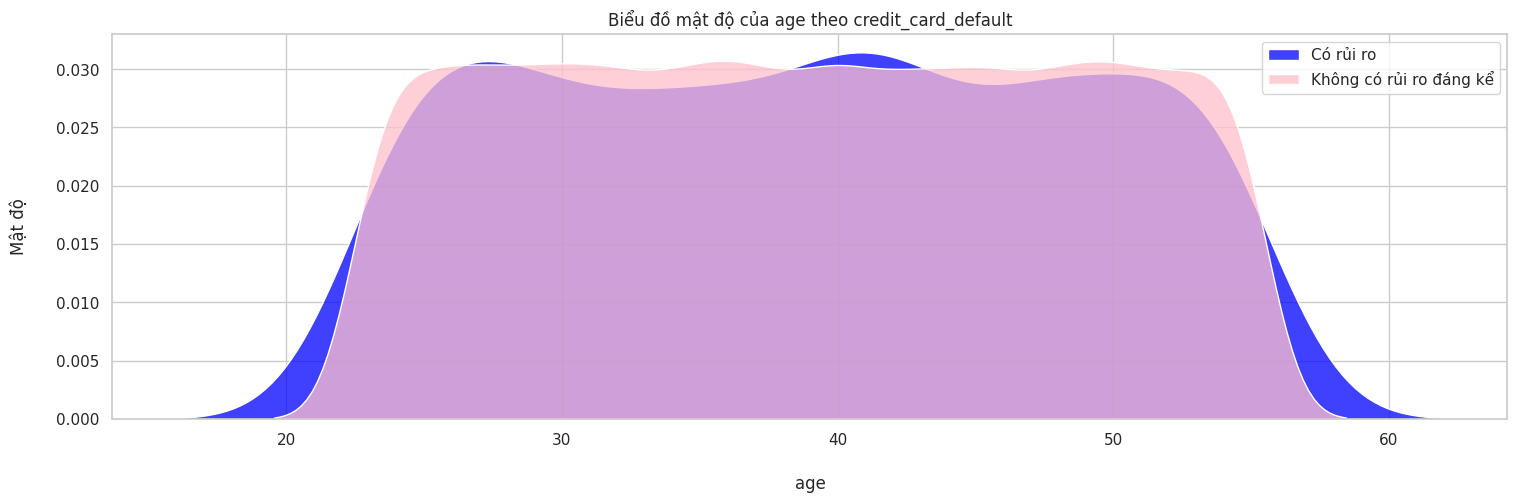

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


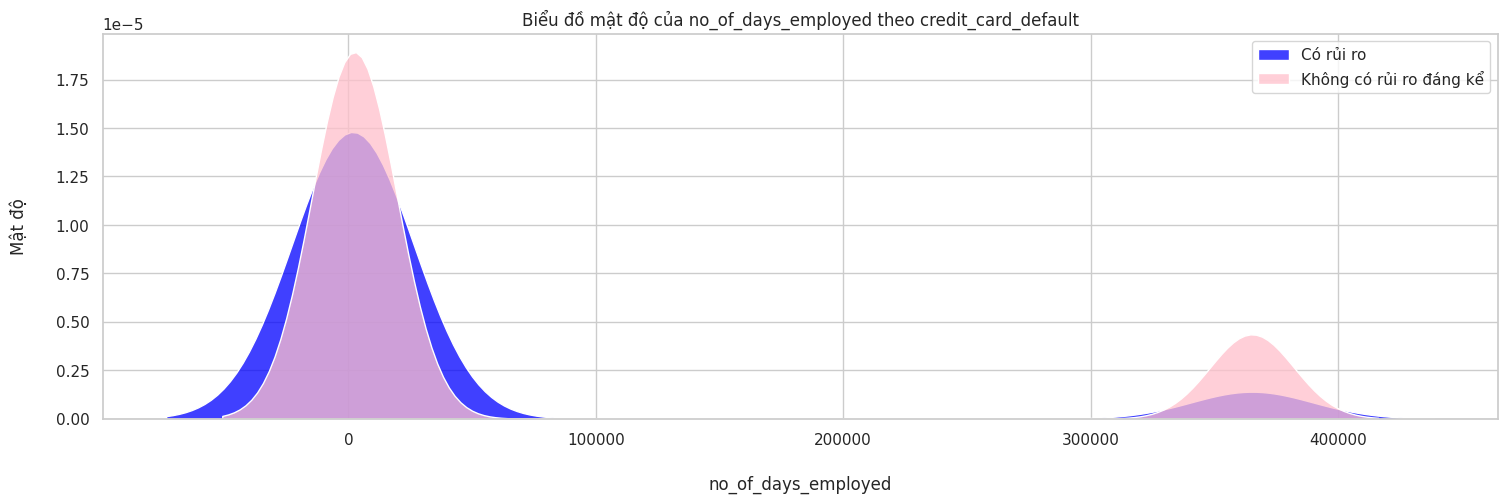

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


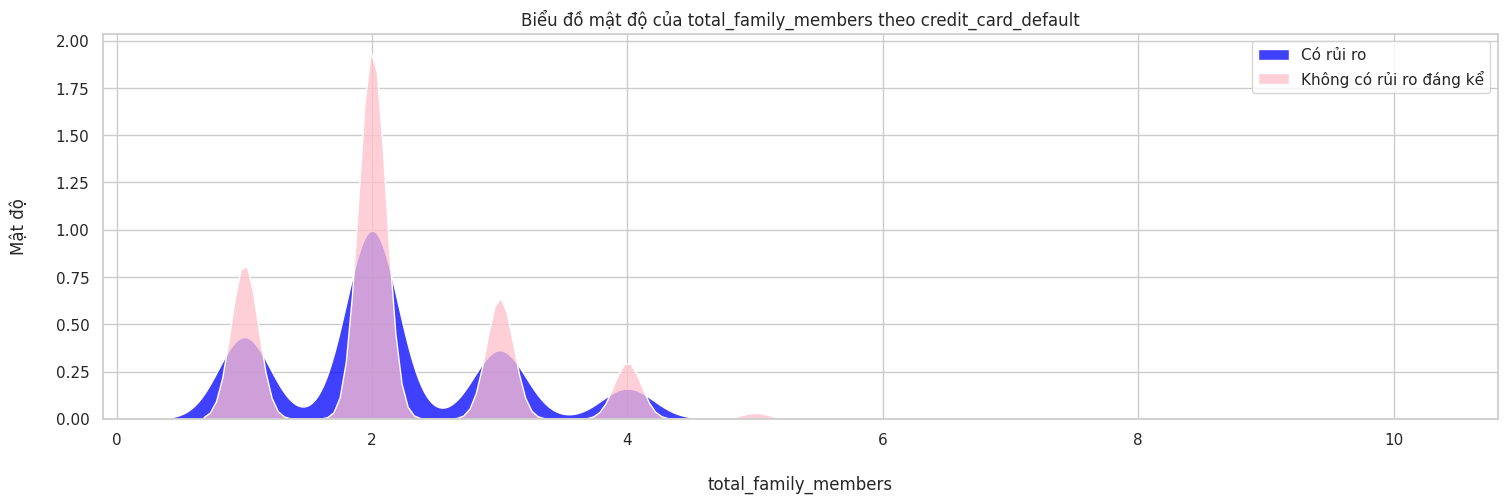

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


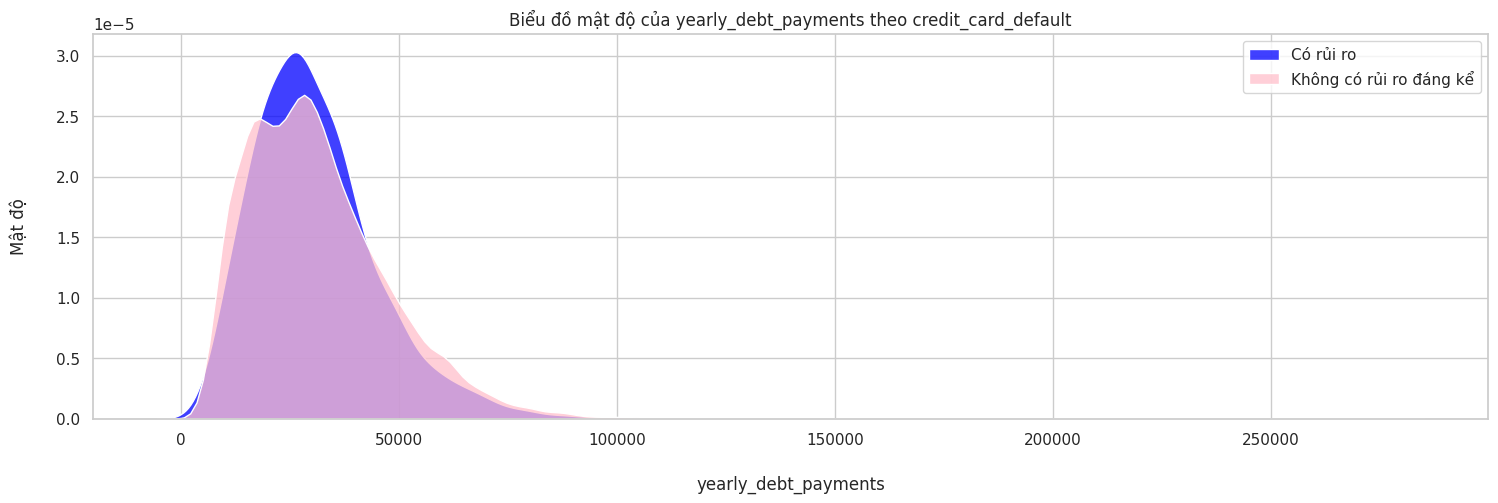

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


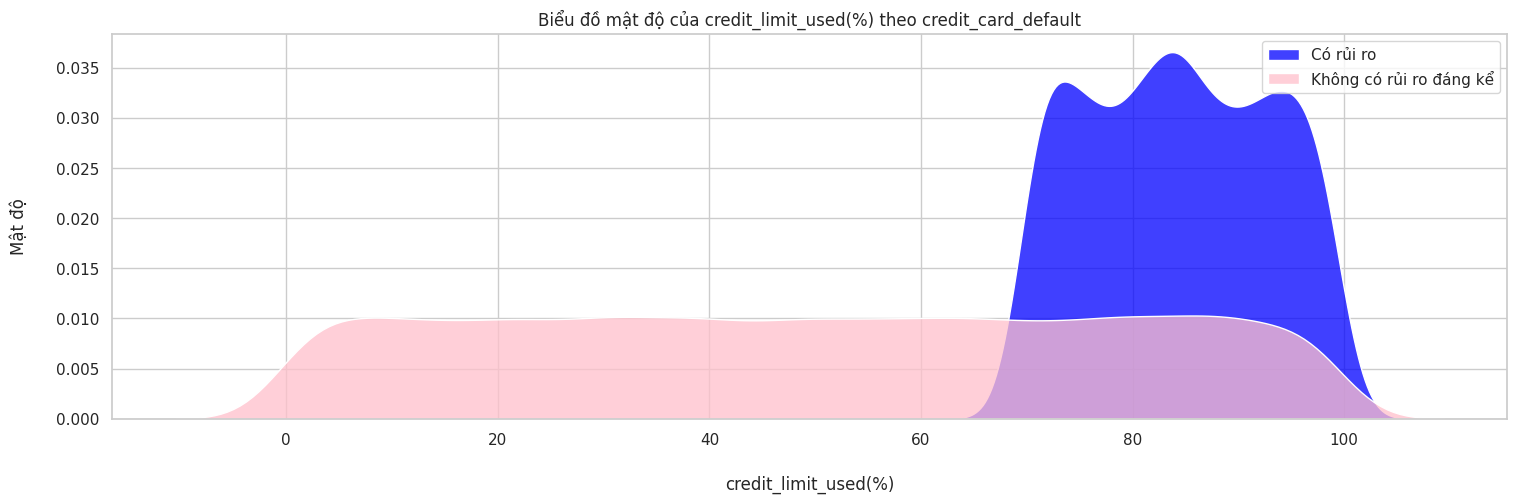

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


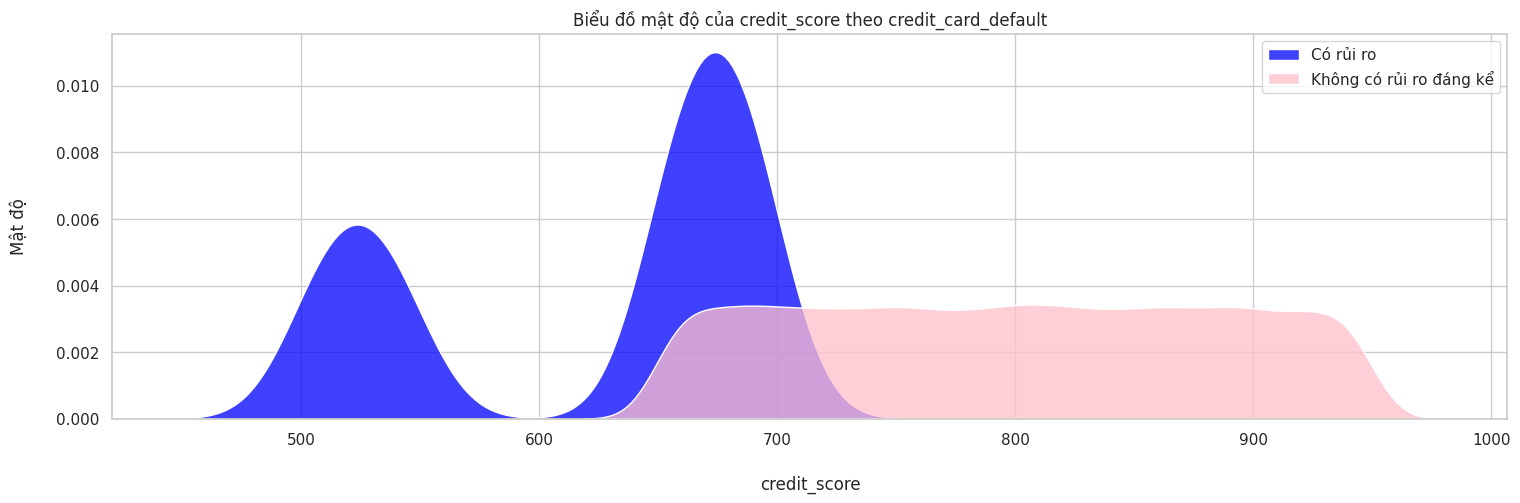

In [21]:
variables_to_plot = [

    'age', 'no_of_days_employed', 'total_family_members', 'yearly_debt_payments', 

    'credit_limit_used(%)', 'credit_score'

]



data_with_default = df[df['credit_card_default'] == 1]

data_without_default = df[df['credit_card_default'] == 0]



for var in variables_to_plot:

    plt.figure(figsize=(18, 5))

    ax1 = plt.subplot(111)

    

    sns.kdeplot(data_with_default[var], color='blue', multiple='stack', label='Có rủi ro')

    sns.kdeplot(data_without_default[var], color='pink', multiple='stack', label='Không có rủi ro đáng kể')

    

    ax1.set_ylabel('Mật độ', labelpad=20)

    ax1.set_xlabel(var, labelpad=20)

    

    if var in []:

        ax1.set_xticks([])



    plt.legend()

    plt.title(f'Biểu đồ mật độ của {var} theo credit_card_default')

    plt.show()

#### Đánh giá

- Tuổi: Không phải là yếu tố quyết định chính trong việc xác định rủi ro tín dụng. Mặc dù nhóm có rủi ro tín dụng có thể trẻ hơn một chút, sự khác biệt không quá lớn.

  

- Khoản thanh toán nợ hàng năm (```yearly_debt_payments```): Những người có rủi ro tín dụng có khoản thanh toán nợ hàng năm thấp hơn, điều này có thể liên quan đến khả năng thanh toán hạn chế hoặc thu nhập thấp.



- Phần trăm hạn mức tín dụng đã sử dụng (```credit_limit_used(%)```): Những người sử dụng gần như toàn bộ hạn mức tín dụng của họ có xu hướng có xảy ra rủi ro tín dụng cao hơn.



- Điểm tín dụng (```credit_score```): Đây là một chỉ số quan trọng nhất. Những người có điểm tín dụng thấp hơn có nguy cơ xảy ra rủi ro tín dụng cao hơn.



- Thu nhập hàng năm trung bình có sự khác biệt rõ rệt giữa hai nhóm có và không có rủi ro tín dụng. Nhóm có rủi ro tín dụng thường có thu nhập thấp hơn, bất kể ngành nghề.

Các ngành nghề có thu nhập cao hơn (như Managers, High Skill Tech Staff) có xu hướng có ít rủi ro tín dụng hơn, trong khi các ngành nghề có thu nhập thấp (như Cleaning Staff, Laborers) có nguy cơ rủi ro tín dụng cao hơn.

## 3. Mã hoá dữ liệu

### Kiểm tra tần suất xuất hiện của thuộc tính

In [22]:
for col_name in df.columns:

    if df[col_name].dtype == 'object':

        count = df[col_name].value_counts()

        print(f"Tần suất xuất hiện thuộc tính '{col_name}':")

        print(count)

        print()

Tần suất xuất hiện thuộc tính 'gender':
gender
F    27061
M    13549
Name: count, dtype: int64

Tần suất xuất hiện thuộc tính 'owns_car':
owns_car
N    26933
Y    13677
Name: count, dtype: int64

Tần suất xuất hiện thuộc tính 'owns_house':
owns_house
Y    28248
N    12362
Name: count, dtype: int64

Tần suất xuất hiện thuộc tính 'occupation_type':
occupation_type
Unknown                  12856
Laborers                  7145
Sales staff               4208
Core staff                3685
Managers                  2750
Drivers                   2413
High skill tech staff     1506
Accountants               1345
Medicine staff            1160
Security staff             918
Cooking staff              792
Cleaning staff             591
Private service staff      357
Low-skill Laborers         293
Secretaries                188
Waiters/barmen staff       182
Realty agents               88
HR staff                    72
IT staff                    61
Name: count, dtype: int64



In [23]:
display(df.describe())

display(df.describe(include='object'))

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,40610.00,40610.00,40610.00,40610.00,40610.00,40610.00,40610.00,40610.00,40610.00,40610.00,40610.00,40610.00,40610.00
mean,39.01,0.40,193456.62,68714.17,2.14,0.17,31397.94,41733.69,50.46,793.59,0.01,0.00,0.03
std,9.54,0.69,102506.46,140202.20,0.88,0.38,16514.13,26396.09,29.09,91.24,0.11,0.04,0.17
min,23.00,0.00,27170.61,2.00,1.00,0.00,2237.47,4003.14,0.00,500.00,0.00,0.00,0.00
25%,31.00,0.00,125902.36,959.00,2.00,0.00,19074.49,23892.15,25.00,717.00,0.00,0.00,0.00
50%,39.00,0.00,171111.48,2274.00,2.00,0.00,28879.08,35500.90,51.00,795.00,0.00,0.00,0.00
75%,47.00,1.00,238634.51,6048.00,3.00,0.00,40278.76,52767.86,76.00,871.00,0.00,0.00,0.00
max,55.00,8.00,2217660.82,365252.00,10.00,1.00,279269.56,648100.99,99.00,949.00,2.00,1.00,1.00


,gender,owns_car,owns_house,occupation_type
count,40610,40610,40610,40610
unique,2,2,2,19
top,F,N,Y,Unknown
freq,27061,26933,28248,12856


### Chia dữ liệu thành các khoảng

In [24]:
df['age'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60], labels=['20-29', '30-39', '40-49', '50-59'])



bin_counts = df['age'].value_counts()

print(bin_counts)

age
30-39    12315
40-49    12248
20-29     9874
50-59     6173
Name: count, dtype: int64


In [25]:
df['no_of_children'] = pd.cut(df['no_of_children'], bins=[-1, 0, 1, 2, 10], labels=['0', '1', '2', '3+'])



bin_counts = df['no_of_children'].value_counts()

print(bin_counts)

no_of_children
0     28591
1      8138
2      3492
3+      389
Name: count, dtype: int64


In [26]:
df['net_yearly_income'] = pd.cut(df['net_yearly_income'], bins=[0, 100000, 200000, 500000, float('inf')], 

                                 labels=['<100,000', '100,000-200,000', '200,000-500,000', '>500,000'])



bin_counts = df['net_yearly_income'].value_counts()

print(bin_counts)

net_yearly_income
100,000-200,000    20002
200,000-500,000    14868
<100,000            5202
>500,000             538
Name: count, dtype: int64


In [27]:
df['no_of_days_employed'] = pd.cut(df['no_of_days_employed'], bins=[-1, 1000, 3000, 6000, float('inf')], 

                                   labels=['<1,000', '1,000-3,000', '3,000-6,000', '>6,000'])



bin_counts = df['no_of_days_employed'].value_counts()

print(bin_counts)

no_of_days_employed
1,000-3,000    13201
<1,000         10546
>6,000         10194
3,000-6,000     6669
Name: count, dtype: int64


In [28]:
df['total_family_members'] = pd.cut(df['total_family_members'], bins=[0, 1, 3, float('inf')], 

                                    labels=['1', '2-3', '4+'])



bin_counts = df['total_family_members'].value_counts()

print(bin_counts)

total_family_members
2-3    28114
1       8899
4+      3597
Name: count, dtype: int64


In [29]:
df['yearly_debt_payments'] = pd.cut(df['yearly_debt_payments'], bins=[0, 10000, 25000, 50000, float('inf')], 

                                     labels=['<10,000', '10,000-25,000', '25,000-50,000', '>50,000'])



bin_counts = df['yearly_debt_payments'].value_counts()

print(bin_counts)

yearly_debt_payments
25,000-50,000    19402
10,000-25,000    14214
>50,000           5195
<10,000           1799
Name: count, dtype: int64


In [30]:
df['credit_limit'] = pd.cut(df['credit_limit'], bins=[0, 50000, 100000, 200000, float('inf')], 

                            labels=['<50,000', '50,000-100,000', '100,000-200,000', '>200,000'])



bin_counts = df['credit_limit'].value_counts()

print(bin_counts)

credit_limit
<50,000            29317
50,000-100,000     10016
100,000-200,000     1226
>200,000              51
Name: count, dtype: int64


In [31]:
df['credit_limit_used(%)'] = pd.cut(df['credit_limit_used(%)'], bins=[-1, 25, 50, 75, 100], 

                                    labels=['0-25%', '25-50%', '50-75%', '75-100%'])



bin_counts = df['credit_limit_used(%)'].value_counts()

print(bin_counts)

credit_limit_used(%)
75-100%    10461
0-25%      10272
50-75%     10024
25-50%      9853
Name: count, dtype: int64


In [32]:
df['credit_score'] = pd.cut(df['credit_score'], bins=[0, 600, 700, 800, 900, float('inf')], 

                            labels=['<600', '600-700', '700-800', '800-900', '>900'])



bin_counts = df['credit_score'].value_counts()

print(bin_counts)

credit_score
800-900    13258
700-800    13070
600-700     7602
>900        6257
<600         423
Name: count, dtype: int64


In [33]:
df['prev_defaults'] = pd.cut(df['prev_defaults'], bins=[-1, 0, 1, float('inf')], 

                             labels=['0', '1', '2+'])



bin_counts = df['prev_defaults'].value_counts()

print(bin_counts)

prev_defaults
0     40433
2+       92
1        85
Name: count, dtype: int64


### Xử lý dữ liệu theo WOE

In [34]:
# def calculate_woe_iv(df, col, target):

#     data = pd.crosstab(df[col], df[target])

#     data.columns = ['Good', 'Bad']



#     data['Good_Dist'] = data['Good'] / data['Good'].sum()

#     data['Bad_Dist'] = data['Bad'] / data['Bad'].sum()

    

#     # Tính WOE, xử lý chia cho 0 với epsilon

#     epsilon = 1e-10

#     data['WOE'] = np.log((data['Good_Dist'] + epsilon) / (data['Bad_Dist'] + epsilon))

    

#     # Tính IV (Information Value)

#     data['IV'] = (data['Good_Dist'] - data['Bad_Dist']) * data['WOE']

    

#     iv = data['IV'].sum()

    

#     return data[['WOE', 'IV']], iv





# columns_to_transform = ['age', 'no_of_children', 'net_yearly_income', 'no_of_days_employed', 'total_family_members', 'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults']

# target_variable = 'credit_card_default' 



# woe_dict = {}

# iv_values = {}



# for col in columns_to_transform:

#     woe_data, iv = calculate_woe_iv(df_woe, col, target_variable)

#     woe_dict[col] = woe_data

#     iv_values[col] = iv



# for col, woe_data in woe_dict.items():

#     print(f"WOE values for column: {col}")

#     print(woe_data)



# print("\nInformation Values (IV) for each column:")

# for col, iv in iv_values.items():

#     print(f"{col}: {iv:.4f}")

### Mã hoá các biến

In [35]:
label_mapping = {}



df['gender'] = df['gender'].map({'M': 0, 'F': 1})



columns_to_encode = ['owns_car', 'owns_house', 'occupation_type']



for column in columns_to_encode:

    df[column] = lb_make.fit_transform(df[column])

    label_mapping[column] = {index: label for index, label in enumerate(lb_make.classes_)}

    

    print(f"Tần suất xuất hiện của cột '{column}':")

    print(df[column].value_counts())

Tần suất xuất hiện của cột 'owns_car':
owns_car
0    26933
1    13677
Name: count, dtype: int64
Tần suất xuất hiện của cột 'owns_house':
owns_house
1    28248
0    12362
Name: count, dtype: int64
Tần suất xuất hiện của cột 'occupation_type':
occupation_type
17    12856
8      7145
14     4208
3      3685
10     2750
4      2413
6      1506
0      1345
11     1160
16      918
2       792
1       591
12      357
9       293
15      188
18      182
13       88
5        72
7        61
Name: count, dtype: int64


In [36]:
columns_to_encode = [

    'age', 'no_of_children', 'net_yearly_income', 'no_of_days_employed',

    'total_family_members', 'yearly_debt_payments', 'credit_limit',

    'credit_limit_used(%)', 'credit_score', 'prev_defaults'

]



for column in columns_to_encode:

    df[column] = lb_make.fit_transform(df[column])

    label_mapping[column] = {index: label for index, label in enumerate(lb_make.classes_)}

In [37]:
df['migrant_worker'] = df['migrant_worker'].fillna(2)

In [38]:
continuous_columns = [

    'age', 'net_yearly_income', 'no_of_days_employed',

    'yearly_debt_payments', 'credit_limit',

    'credit_limit_used(%)', 'credit_score'

]



scaler = StandardScaler()



df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40610 entries, 0 to 40609
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      40610 non-null  float64
 1   gender                   40610 non-null  int64  
 2   owns_car                 40610 non-null  int64  
 3   owns_house               40610 non-null  int64  
 4   no_of_children           40610 non-null  int64  
 5   net_yearly_income        40610 non-null  float64
 6   no_of_days_employed      40610 non-null  float64
 7   occupation_type          40610 non-null  int64  
 8   total_family_members     40610 non-null  int64  
 9   migrant_worker           40610 non-null  float64
 10  yearly_debt_payments     40610 non-null  float64
 11  credit_limit             40610 non-null  float64
 12  credit_limit_used(%)     40610 non-null  float64
 13  credit_score             40610 non-null  float64
 14  prev_defaults         

In [40]:
joblib.dump(scaler, 'scaler.pkl')

FileLink(r'scaler.pkl')

/kaggle/working/scaler.pkl

In [41]:
joblib.dump(label_mapping, 'label_encoder.pkl')

FileLink(r'label_encoder.pkl')

/kaggle/working/label_encoder.pkl

### Ma trận tương quan mới

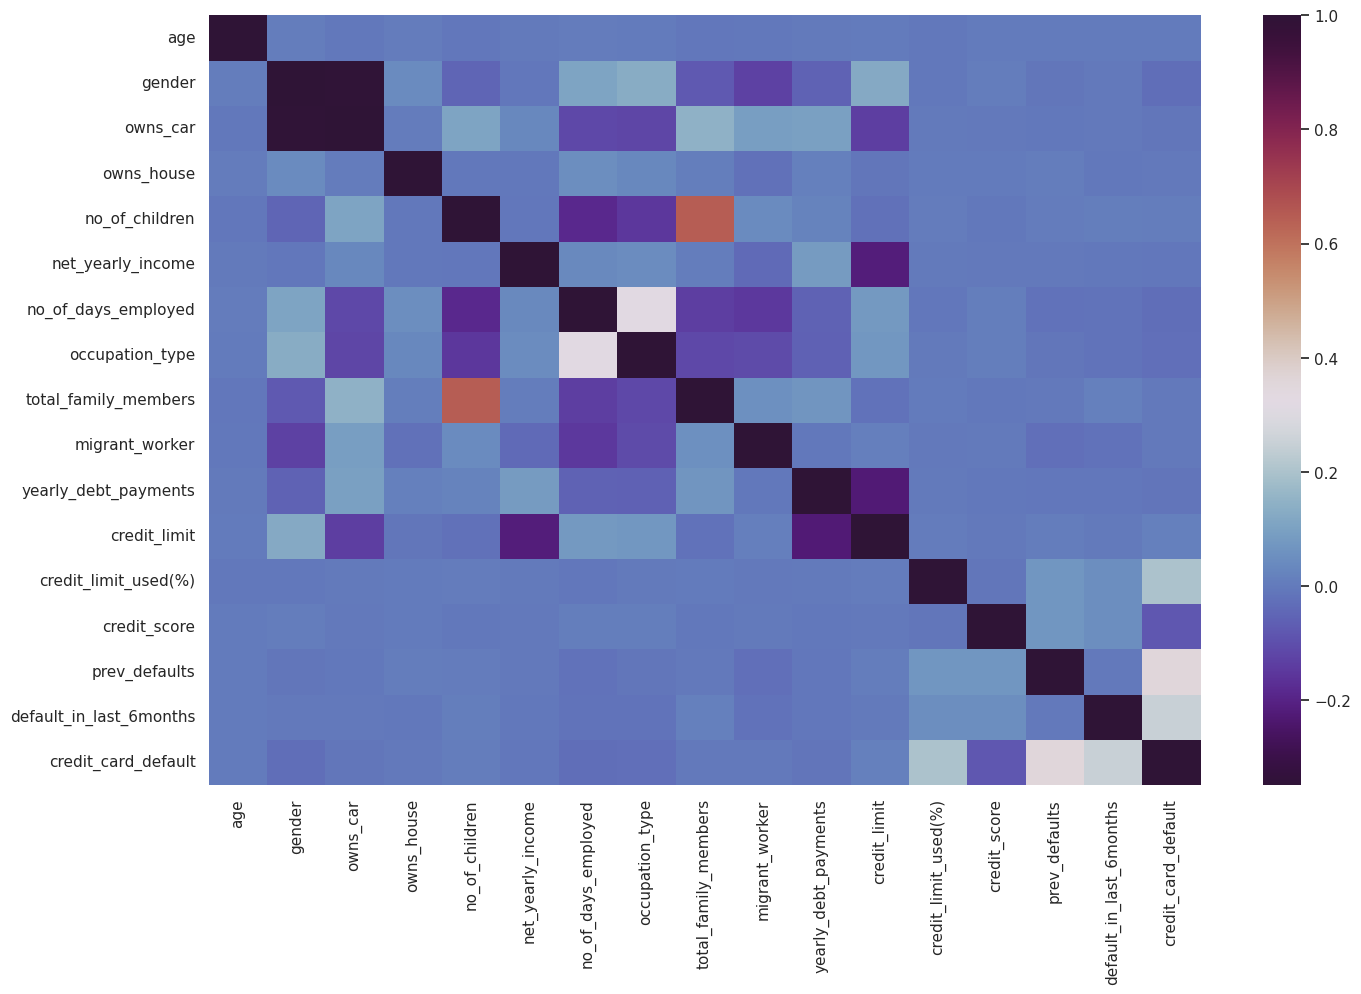

In [42]:
numeric_columns_new = df.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()

numeric_df_new = df[numeric_columns_new]



plt.figure(figsize=(16, 10))

sns.heatmap(numeric_df_new.corr(), annot=False, fmt='.2f', cmap='twilight_shifted')

plt.show()

## 4. Xây dựng mô hình

### 4.1. Phân chia dữ liệu

#### 4.1.1. Tạo 2 ma trận X và y lần lượt gồm các biến độc lập và biến phụ thuộc

In [43]:
X = df.drop(['credit_card_default'], axis=1)

X.head(5)

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,-1.35,0,0,1,0,-0.89,-1.21,8,1,0.00,-1.00,0.58,0.44,0.30,0,0
1,-0.36,0,0,1,0,0.45,0.48,8,1,0.00,0.05,0.58,-0.45,-1.30,0,0
2,-0.36,1,0,1,0,-0.89,1.32,3,1,0.00,-1.00,0.58,-1.34,-0.50,0,0
3,0.63,0,1,1,0,0.45,-1.21,3,0,0.00,0.05,-1.32,0.44,1.91,0,0
4,0.63,1,1,0,0,0.45,-1.21,0,1,1.00,0.05,0.58,-1.34,1.91,0,0


In [44]:
y = df['credit_card_default']

y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: credit_card_default, dtype: int64

#### 4.1.2. Xây dựng tham số cho việc chia dữ liệu huấn luyện và kiểm thử

In [45]:
test_sizes = [0.3, 0.25, 0.2]

### 4.2. Xây dựng ban đầu các mô hình phân lớp và so sánh

- **Random Forest**: Tập hợp nhiều cây quyết định và kết hợp kết quả để giảm overfitting và tăng ổn định, đối phó với nhiễu.



- **Naive Bayes**: Dựa trên định lý Bayes, giả định sự độc lập giữa các biến, đặc biệt hiệu quả cho dữ liệu văn bản. Sử dụng xác suất để dự đoán lớp của mẫu dựa trên thông tin biến độc lập.



- **Gradient Boosting**: Xây dựng các cây theo chuỗi, sửa lỗi của các cây trước đó để cải thiện độ chính xác, tạo ra mô hình mới với hiệu suất cao hơn.



- **XGBoost**: Mô hình cải tiến của Gradient Boosting, tăng tốc độ và hiệu quả so với mô hình gốc.



- **Neural Network**: Mô phỏng cấu trúc não nhân tạo. Học đặc trưng phức tạp thông qua nhiều lớp để thực hiện dự đoán.

In [46]:
results = []



models = [

    RandomForestClassifier(criterion='gini', random_state=42),

    GaussianNB(),

    GradientBoostingClassifier(random_state=42),

    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),

    MLPClassifier(random_state=42, max_iter=1000)

]



model_names = [

    'Random Forest',

    'Naive Bayes',

    'Gradient Boosting',

    'XGBoost',

    'Neural Network'

]

In [47]:
for test_size in test_sizes:

    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)



    smote = SMOTE(random_state=42)

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



    accuracy, roc_auc, precision, recall, f1 = [], [], [], [], []



    for model_name, model in zip(model_names, models):

        model.fit(X_train_resampled, y_train_resampled)

        y_pred = model.predict(X_test)



        accuracy.append(accuracy_score(y_test, y_pred))

        roc_auc.append(roc_auc_score(y_test, y_pred))

        precision.append(precision_score(y_test, y_pred))

        recall.append(recall_score(y_test, y_pred))

        f1.append(f1_score(y_test, y_pred))



        filename = f"{model_name.replace(' ', '_')}_{test_size}.joblib"

        joblib.dump(model, filename)

        

        display(FileLink(filename))



    result_df = pd.DataFrame({

        'Model': model_names,

        'Accuracy': accuracy,

        'ROC AUC': roc_auc,

        'Precision': precision,

        'Recall': recall,

        'F1 Score': f1

    })



    result_df['Test Size'] = test_size

    results.append(result_df)

/kaggle/working/Random_Forest_0.3.joblib

/kaggle/working/Naive_Bayes_0.3.joblib

/kaggle/working/Gradient_Boosting_0.3.joblib

/kaggle/working/XGBoost_0.3.joblib

/kaggle/working/Neural_Network_0.3.joblib

/kaggle/working/Random_Forest_0.25.joblib

/kaggle/working/Naive_Bayes_0.25.joblib

/kaggle/working/Gradient_Boosting_0.25.joblib

/kaggle/working/XGBoost_0.25.joblib

/kaggle/working/Neural_Network_0.25.joblib

/kaggle/working/Random_Forest_0.2.joblib

/kaggle/working/Naive_Bayes_0.2.joblib

/kaggle/working/Gradient_Boosting_0.2.joblib

/kaggle/working/XGBoost_0.2.joblib

/kaggle/working/Neural_Network_0.2.joblib

In [48]:
df_resampled = pd.DataFrame({'credit_card_default': y_train_resampled})

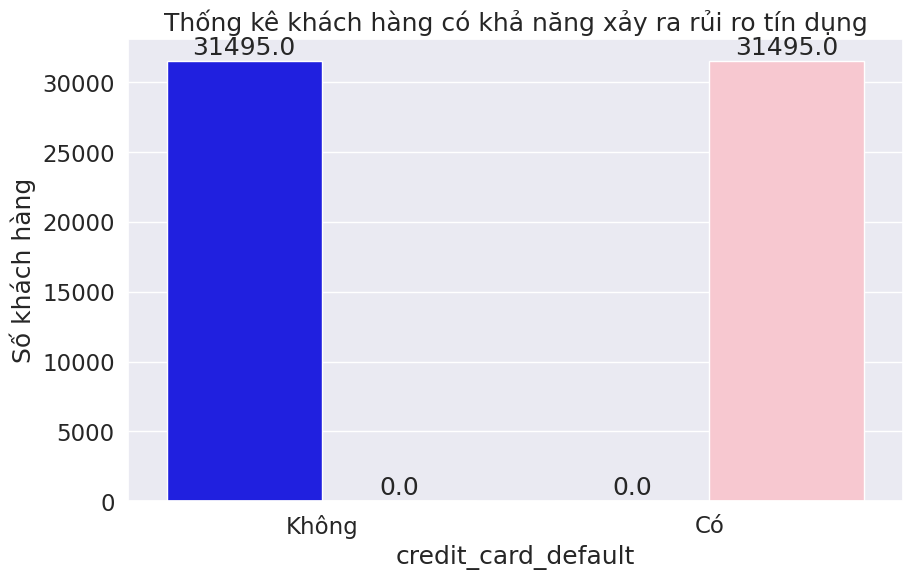

In [49]:
sns.set(font_scale=1.5)



ax = sns.countplot(x='credit_card_default', data=df_resampled, hue='credit_card_default', palette=['blue', 'pink'])

ax.legend_.remove()



ax.set_title('Thống kê khách hàng có khả năng xảy ra rủi ro tín dụng')

ax.set_ylabel('Số khách hàng')



ax.set_xticks([0, 1])

ax.set_xticklabels(['Không', 'Có'])



fig = plt.gcf()

fig.set_size_inches(10, 6)



for p in ax.patches:

    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),

                ha='center', va='center', xytext=(0, 10), textcoords='offset points')



plt.show()

In [50]:
model_comparison = pd.concat(results, ignore_index=True)



def get_model_results(model_name, results_df):

    return results_df.query("Model == @model_name")

In [51]:
model_comparison

,Model,Accuracy,ROC AUC,Precision,Recall,F1 Score,Test Size
0,Random Forest,0.98,0.74,0.62,0.49,0.55,0.30
1,Naive Bayes,0.98,0.62,1.00,0.24,0.39,0.30
2,Gradient Boosting,0.96,0.92,0.41,0.87,0.55,0.30
3,XGBoost,0.97,0.78,0.57,0.57,0.57,0.30
4,Neural Network,0.96,0.86,0.41,0.75,0.53,0.30
5,Random Forest,0.98,0.76,0.61,0.53,0.57,0.25
6,Naive Bayes,0.98,0.62,1.00,0.24,0.39,0.25
7,Gradient Boosting,0.96,0.93,0.41,0.91,0.56,0.25
8,XGBoost,0.97,0.79,0.58,0.60,0.59,0.25
9,Neural Network,0.96,0.88,0.41,0.80,0.54,0.25


In [52]:
xgb_results = get_model_results('XGBoost', model_comparison)

xgb_results

,Model,Accuracy,ROC AUC,Precision,Recall,F1 Score,Test Size
3,XGBoost,0.97,0.78,0.57,0.57,0.57,0.30
8,XGBoost,0.97,0.79,0.58,0.60,0.59,0.25
13,XGBoost,0.97,0.79,0.56,0.60,0.58,0.20


In [53]:
gb_results = get_model_results('Gradient Boosting', model_comparison)

gb_results

,Model,Accuracy,ROC AUC,Precision,Recall,F1 Score,Test Size
2,Gradient Boosting,0.96,0.92,0.41,0.87,0.55,0.30
7,Gradient Boosting,0.96,0.93,0.41,0.91,0.56,0.25
12,Gradient Boosting,0.96,0.93,0.40,0.91,0.55,0.20


In [54]:
rf_results = get_model_results('Random Forest', model_comparison)

rf_results

,Model,Accuracy,ROC AUC,Precision,Recall,F1 Score,Test Size
0,Random Forest,0.98,0.74,0.62,0.49,0.55,0.30
5,Random Forest,0.98,0.76,0.61,0.53,0.57,0.25
10,Random Forest,0.98,0.75,0.64,0.51,0.57,0.20


In [55]:
nb_results = get_model_results('Naive Bayes', model_comparison)

nb_results

,Model,Accuracy,ROC AUC,Precision,Recall,F1 Score,Test Size
1,Naive Bayes,0.98,0.62,1.00,0.24,0.39,0.30
6,Naive Bayes,0.98,0.62,1.00,0.24,0.39,0.25
11,Naive Bayes,0.98,0.63,1.00,0.26,0.42,0.20


In [56]:
nn_results = get_model_results('Neural Network', model_comparison)

nn_results

,Model,Accuracy,ROC AUC,Precision,Recall,F1 Score,Test Size
4,Neural Network,0.96,0.86,0.41,0.75,0.53,0.30
9,Neural Network,0.96,0.88,0.41,0.80,0.54,0.25
14,Neural Network,0.96,0.85,0.43,0.73,0.54,0.20


#### Đánh giá

- **Gradient Boosting** là mô hình có khả năng phát hiện rủi ro tốt nhất (recall rất cao, ROC AUC rất tốt), nhưng precision thấp. Mô hình có thể dự đoán nhầm nhiều trường hợp không có rủi ro là có.



- **Random Forest** có độ chính xác và precision cao, nghĩa là mô hình dự đoán đúng nhiều hơn về các trường hợp có rủi ro tín dụng. Tuy nhiên, recall thấp làm cho mô hình bỏ sót nhiều trường hợp có rủi ro.



- **XGBoost** có sự cân bằng tốt giữa các chỉ số, đặc biệt là F1 Score, tuy nhiên vẫn còn khả năng cải thiện thêm về recall để đảm bảo không bỏ sót nhiều trường hợp có rủi ro tín dụng.



- **Naive Bayes** không phải là lựa chọn tốt cho bài toán này vì mặc dù precision rất cao (1.0), nhưng recall rất thấp, dẫn đến việc mô hình bỏ sót phần lớn các trường hợp có rủi ro tín dụng.



- **Neural Network** có khả năng phát hiện tốt (recall cao), nhưng precision thấp, điều này có thể dẫn đến việc dự đoán nhiều trường hợp không có rủi ro là có.

#### Với bài toán đánh giá rủi ro tín dụng của khách hàng

- **Recall**: Là chỉ số quan trọng nhất trong bài toán đánh giá rủi ro tín dụng, đặc biệt khi mục tiêu là phát hiện đúng tất cả các khách hàng có nguy cơ vỡ nợ (rủi ro tín dụng). Recall cao nghĩa là mô hình có thể phát hiện được hầu hết các trường hợp khách hàng có rủi ro, giúp ngân hàng tránh được những tổn thất lớn từ các khoản vay không trả được. Nếu bỏ sót nhiều trường hợp có rủi ro (recall thấp), ngân hàng sẽ chịu nhiều tổn thất tài chính không mong muốn.



- **Precision**: Phản ánh tỷ lệ chính xác của các dự đoán về rủi ro. Precision cao có nghĩa là trong những trường hợp mà mô hình dự đoán có rủi ro tín dụng, phần lớn dự đoán đó là đúng. Precision thấp có thể gây ra "cảnh báo giả" (false positives), khiến ngân hàng lãng phí nguồn lực vào các khách hàng không thực sự có nguy cơ vỡ nợ.



- **ROC AUC**: Thể hiện khả năng phân biệt giữa hai lớp trên toàn bộ phổ của các ngưỡng quyết định. ROC AUC > 0.8 thường được coi là tốt cho bài toán phân loại nhị phân. Đây là chỉ số tổng quát để đánh giá hiệu suất mô hình.



- **F1**: Đây là chỉ số cân bằng giữa precision và recall. F1 score cao có nghĩa là mô hình vừa có khả năng phát hiện rủi ro tốt (recall), vừa dự đoán chính xác hơn (precision). Chỉ số quan trọng nếu muốn cân bằng giữa việc phát hiện rủi ro và tránh cảnh báo giả.



- **Accuracy**: Trong bài toán này, accuracy thường không phải là chỉ số quan trọng nhất, bởi vì dữ liệu về rủi ro tín dụng thường mất cân bằng (số khách hàng không có rủi ro nhiều hơn khách hàng có rủi ro). Một mô hình có thể đạt accuracy cao chỉ bằng cách dự đoán hầu hết khách hàng là không có rủi ro nhưng không thực sự hữu ích.



#### Lựa chọn mô hình: XGBoost

- Lý do: Mô hình cân bằng giữa precision và recall, vừa phát hiện được rủi ro tín dụng, vừa giảm thiểu cảnh báo giả.

### 4.3. Sử dụng phương pháp cross-validation (chia tách dữ liệu kiểm tra)

- Đánh giá khả năng tổng quát hóa của mô hình và đo lường hiệu suất của nó trên các dữ liệu chưa từng thấy.

- Đánh giá hiệu suất của mô hình trên nhiều tập dữ liệu kiểm thử khác nhau, giảm sự phụ thuộc vào một tập dữ liệu kiểm thử cụ thể, đảm bảo rằng đánh giá hiệu suất không bị chệch do sự ngẫu nhiên trong quá trình chia dữ liệu.

- Phát hiện và tránh overfitting hoặc underfitting, giúp tinh chỉnh siêu tham số mô hình để cải thiện hiệu suất.

- Tận dụng tối đa thông tin từ dữ liệu có sẵn (nhất là với bộ dữ liệu nhỏ).

- Chi phí tính toán cao.

- Dữ liệu được chia thành các tập huấn luyện và kiểm thử theo một số lượng fold (dưới đây là 5). Mỗi lượt cross-validation, một fold được chọn làm tập kiểm thử, và các fold còn lại được sử dụng để huấn luyện mô hình. Mô hình được đánh giá trên fold kiểm thử để đo lường độ chính xác hoặc các độ đo khác.

In [57]:
models = {

    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),

    'Naive Bayes': GaussianNB(),

    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),

    'XGBoost': XGBClassifier(n_estimators=100, max_depth=5, random_state=42),

    # 'Neural Network': MLPClassifier(random_state=42, max_iter=1000)

}



rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)



metrics = ['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1 Score', 'MCC', 'Balanced Accuracy']



results = {metric: [] for metric in metrics}

results['Model'] = []

In [58]:
for train_index, test_index in rskf.split(X, y):

    X_train_resampled, X_test = X.iloc[train_index], X.iloc[test_index]

    y_train_resampled, y_test = y.iloc[train_index], y.iloc[test_index]

    

    for model_name, model in models.items():

        model.fit(X_train_resampled, y_train_resampled)

        y_pred = model.predict(X_test)

        

        results['Model'].append(model_name)

        metric_values = [

            accuracy_score(y_test, y_pred),

            roc_auc_score(y_test, y_pred),

            precision_score(y_test, y_pred),

            recall_score(y_test, y_pred),

            f1_score(y_test, y_pred),

            matthews_corrcoef(y_test, y_pred),

            balanced_accuracy_score(y_test, y_pred)

        ]

        

        for metric, value in zip(metrics, metric_values):

            results[metric].append(value)



cv_results = pd.DataFrame(results)

summary_df = cv_results.groupby('Model').agg(['mean', 'std']).sort_values(by=('Accuracy', 'mean'), ascending=False)



summary_df

Accuracy      ROC AUC      Precision      Recall       \
                      mean  std    mean  std      mean  std   mean  std   
Model                                                                     
Gradient Boosting     0.98 0.00    0.69 0.01      0.86 0.05   0.39 0.03   
XGBoost               0.98 0.00    0.72 0.01      0.75 0.06   0.43 0.02   
Naive Bayes           0.98 0.00    0.60 0.01      1.00 0.00   0.21 0.02   
Random Forest         0.98 0.00    0.60 0.01      1.00 0.00   0.21 0.02   

                  F1 Score       MCC      Balanced Accuracy       
                      mean  std mean  std              mean  std  
Model                                                             
Gradient Boosting     0.53 0.03 0.57 0.03              0.69 0.01  
XGBoost               0.55 0.03 0.56 0.03              0.72 0.01  
Naive Bayes           0.34 0.03 0.45 0.03              0.60 0.01  
Random Forest         0.34 0.03 0.45 0.03              0.60 0.01

- MCC (Matthews Correlation Coefficient): Cchỉ số đánh giá các mô hình trên dữ liệu mất cân bằng. Phản ánh tương quan giữa các dự đoán đúng và sai, giá trị dao động từ -1 đến 1. MCC cao thể hiện mô hình hoạt động tốt.



- Balanced Accuracy: Điều chỉnh độ chính xác tổng thể trong các bài toán có dữ liệu lệch, nhằm đảm bảo sự cân bằng giữa hai lớp.



#### Đánh giá

- **Gradient Boosting**: precision cao nhưng recall thấp, có nghĩa là mô hình dự đoán rủi ro rất chính xác, nhưng có xu hướng bỏ qua nhiều trường hợp rủi ro. Phù hợp nếu cần giảm thiểu cảnh báo sai (false positives).



- **XGBoost**: lựa chọn cân bằng hơn so với Gradient Boosting, với ROC AUC và recall cao hơn, cho thấy mô hình có khả năng phân biệt giữa các lớp tốt hơn và phát hiện nhiều hơn các trường hợp có rủi ro tín dụng.



- **Naive Bayes** và **Random Forest**: có precision tuyệt đối nhưng recall rất thấp, dẫn đến bỏ sót rất nhiều trường hợp rủi ro. Mô hình này không phù hợp nếu cần phát hiện nhiều trường hợp rủi ro.

### 4.4. Kết quả chi tiết từ XGBoost

In [59]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.3, random_state=42)



smote = SMOTE(random_state=42)

X_train_xgb_resampled, y_train_xgb_resampled = smote.fit_resample(X_train_xgb, y_train_xgb)

In [60]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_clf.fit(X_train_xgb_resampled, y_train_xgb_resampled)



y_pred_xgb = xgb_clf.predict(X_test_xgb)

print("Giá trị nhãn mô hình dự đoán được:\n", y_pred_xgb)



print(f"Độ chính xác của XGBoost trên tập kiểm thử: {accuracy_score(y_test_xgb, y_pred_xgb) * 100}%")

print("Classification Report:\n", classification_report(y_test_xgb, y_pred_xgb))

Giá trị nhãn mô hình dự đoán được:
 [0 0 0 ... 0 0 0]
Độ chính xác của XGBoost trên tập kiểm thử: 97.47188705573339%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11825
           1       0.57      0.57      0.57       358

    accuracy                           0.97     12183
   macro avg       0.78      0.78      0.78     12183
weighted avg       0.97      0.97      0.97     12183



#### Ma trận nhầm lẫn

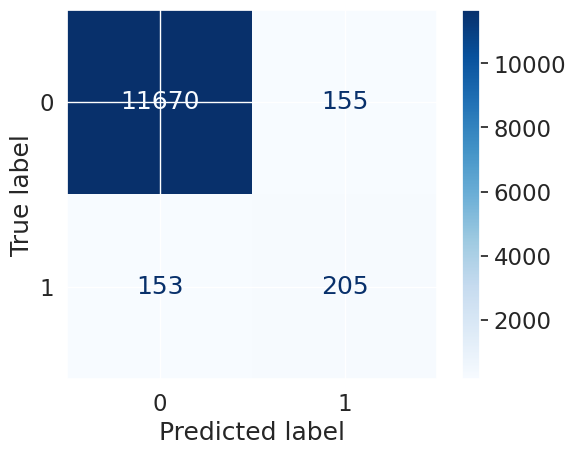

In [61]:
conf_matrix_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)



disp = ConfusionMatrixDisplay(conf_matrix_xgb, display_labels=xgb_clf.classes_)

disp.plot(cmap='Blues', values_format='d')

plt.show()

#### Dự đoán xác suất rời công ty dựa trên tập kiểm tra (chỉ lấy giá trị Positive)

In [62]:
default_prob_xgb = xgb_clf.predict_proba(X_test_xgb)[:, 1]



print(default_prob_xgb)

[2.09426526e-05 1.39649259e-04 7.62207856e-05 ... 1.17041825e-04
 8.19898196e-05 4.27023098e-02]


In [63]:
X_test_with_prob_xgb = X_test_xgb.copy()

X_test_with_prob_xgb['Predicted Probability'] = default_prob_xgb



high_prob_xgb = X_test_with_prob_xgb[X_test_with_prob_xgb['Predicted Probability'] > 0.5]

In [64]:
print("Những khách hàng có rủi ro tín dụng lớn hơn 0.5:")

high_prob_xgb

Những khách hàng có rủi ro tín dụng lớn hơn 0.5:


,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,Predicted Probability
34923,-0.36,0,0,1,0,-0.89,0.48,8,1,0.00,0.05,0.58,1.32,-1.30,0,0,0.87
21720,-0.36,0,0,1,0,0.45,0.48,8,0,0.00,-1.00,0.58,0.44,-1.30,0,0,0.75
39554,0.63,1,0,0,0,-0.89,-0.37,2,1,0.00,0.05,0.58,1.32,-1.30,0,0,0.61
20849,-1.35,0,0,1,0,-0.89,-1.21,16,0,1.00,0.05,0.58,1.32,-1.30,0,0,0.53
39352,1.62,0,0,1,2,-0.89,-1.21,8,2,1.00,2.16,0.58,0.44,1.10,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,-1.35,0,0,0,0,-0.89,1.32,17,0,0.00,0.05,0.58,1.32,-1.30,0,0,0.98
15606,-0.36,1,0,1,2,-0.89,-0.37,14,2,0.00,0.05,0.58,1.32,-1.30,0,0,0.67
34354,-1.35,0,1,1,0,-0.89,-1.21,10,1,0.00,0.05,-1.32,1.32,1.10,0,1,1.00
16132,0.63,1,0,1,1,-0.89,0.48,14,1,0.00,-1.00,0.58,1.32,1.10,0,0,1.00


#### Mức độ quan trọng của đặc trưng

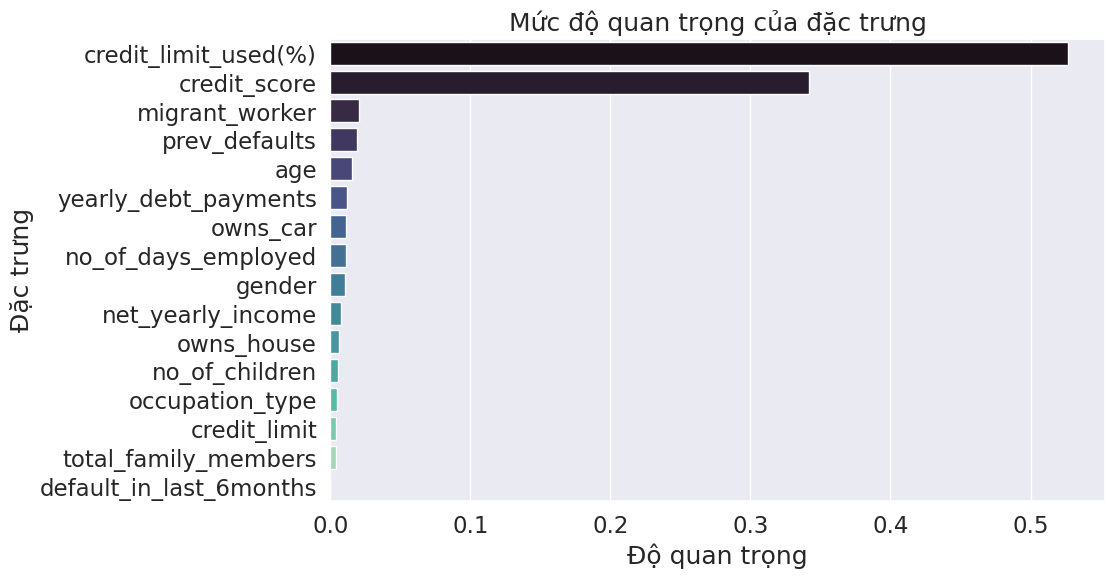

In [65]:
feature_importances_xgb = xgb_clf.feature_importances_

features = X.columns.tolist()



feature_importance_df = pd.DataFrame({'Đặc trưng': features, 'Độ quan trọng': feature_importances_xgb})

feature_importance_df = feature_importance_df.sort_values(by='Độ quan trọng', ascending=False)



plt.figure(figsize=(10, 6))

sns.barplot(x='Độ quan trọng', y='Đặc trưng', data=feature_importance_df, palette='mako')

plt.title('Mức độ quan trọng của đặc trưng')

plt.show()

#### Vẽ ROC Curve

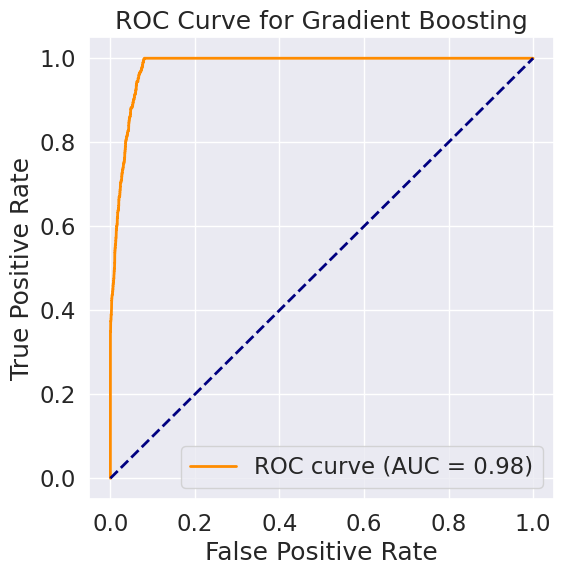

In [66]:
fpr, tpr, thresholds = roc_curve(y_test_xgb, default_prob_xgb)

roc_auc = roc_auc_score(y_test_xgb, default_prob_xgb)



plt.figure(figsize=(6, 6))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')



plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve for Gradient Boosting')

plt.legend(loc='lower right')



plt.show()

#### Cải thiện mô hình

In [67]:
param_grid = {

    'n_estimators': [100, 200, 300],

    'max_depth': [3, 5, 7],      

    'learning_rate': [0.01, 0.1, 0.2],    

    'subsample': [0.6, 0.8, 1.0],   

    'colsample_bytree': [0.6, 0.8, 1.0],                         

    'reg_alpha': [0, 0.1, 1],                  

    'reg_lambda': [0, 1, 10],                    

}

In [68]:
grid_search = GridSearchCV(estimator=xgb_clf, 

                           param_grid=param_grid, 

                           scoring='roc_auc', 

                           cv=5,        

                           verbose=1,           

                           n_jobs=-1)           



grid_search.fit(X_train_xgb_resampled, y_train_xgb_resampled)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [0, 1, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [69]:
print("Best parameters found: ", grid_search.best_params_)

print("Best ROC AUC score: ", grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 0.8}
Best ROC AUC score:  0.9993761098256929


In [70]:
xgb_best = XGBClassifier(**grid_search.best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_best.fit(X_train_xgb_resampled, y_train_xgb_resampled)



y_pred_best_xgb = xgb_best.predict(X_test_xgb)

print("Giá trị nhãn mô hình dự đoán được:\n", y_pred_best_xgb)



print(f"Độ chính xác của XGBoost: {accuracy_score(y_test_xgb, y_pred_best_xgb) * 100}%")

print("Classification Report:\n", classification_report(y_test_xgb, y_pred_best_xgb))

Giá trị nhãn mô hình dự đoán được:
 [0 0 0 ... 0 0 0]
Độ chính xác của XGBoost: 97.53755232701306%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11825
           1       0.58      0.57      0.58       358

    accuracy                           0.98     12183
   macro avg       0.78      0.78      0.78     12183
weighted avg       0.98      0.98      0.98     12183



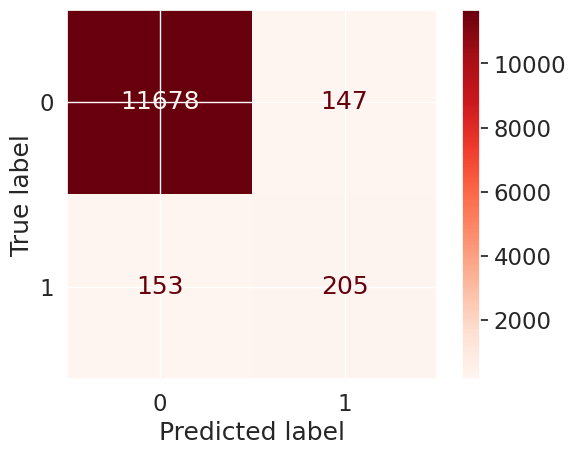

In [71]:
conf_matrix_best_xgb = confusion_matrix(y_test_xgb, y_pred_best_xgb)



disp = ConfusionMatrixDisplay(conf_matrix_best_xgb, display_labels=xgb_best.classes_)

disp.plot(cmap='Reds', values_format='d')

plt.show()

In [72]:
filename = f"XGBoost_0.3_GridSearch.joblib"

joblib.dump(xgb_best, filename)

        

display(FileLink(filename))

/kaggle/working/XGBoost_0.3_GridSearch.joblib